<a href="https://colab.research.google.com/github/bmfaiml/bmfrepo/blob/main/Copy_of_ASSIGNMENT_III_FDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd

# Step 3: Load the dataset (adjust the path if file is in Drive)
file_path = "/content/drive/MyDrive/Customer_Feedback_500.csv"  # Change if different location
df = pd.read_csv(file_path)

# Step 4: Check dataset shape and first few rows
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nSample Rows:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (500, 3)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    500 non-null    int64 
 1   Feedback_Text  500 non-null    object
 2   Sentiment      500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB
None

Sample Rows:
   Customer_ID                                      Feedback_Text Sentiment
0            1              Not bad, but delivery could be faster   Neutral
1            2        Amazing shopping experience, will buy again  Positive
2            3              Not bad, but delivery could be faster   Neutral
3            4              Not bad, but delivery could be faster   Neutral
4            5  The product was damaged and support was unhelpf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (first run only)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Added this download


# Step 3: Load the dataset
file_path = "/content/drive/MyDrive/Customer_Feedback_500.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Step 4: Check dataset shape and first few rows
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSample Rows:")
print(df.head())

# Step 5: Define preprocessing function
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, special characters, and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Step 6: Apply preprocessing to Feedback_Text
df['Cleaned_Feedback'] = df['Feedback_Text'].apply(preprocess_text)

# Step 7: Check results
print("\nPreprocessed Sample Rows:")
print(df[['Feedback_Text', 'Cleaned_Feedback']].head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Dataset Shape: (500, 3)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    500 non-null    int64 
 1   Feedback_Text  500 non-null    object
 2   Sentiment      500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB
None

Sample Rows:
   Customer_ID                                      Feedback_Text Sentiment
0            1              Not bad, but delivery could be faster   Neutral
1            2        Amazing shopping experience, will buy again  Positive
2            3              Not bad, but delivery could be faster   Neutral
3            4              Not bad, but delivery could be faster   Neutral
4            5  The product was damaged and support was unhelpful  Negative

Preprocessed Sample Rows:
                                       Feedback_Text  \
0              Not bad, but deliv

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Cleaned_Feedback'])

print("BoW Shape:", X_bow.shape)  # (rows, unique words)

BoW Shape: (500, 28)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Cleaned_Feedback'])

print("BoW Shape:", X_bow.shape)  # (rows, unique words)

BoW Shape: (500, 28)


In [ ]:
# Step 2: Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (first run only)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Added this download


# Step 3: Load the dataset (assuming df is already loaded from the previous cell)
# If df is not loaded, you would need to load it here, e.g.:
# file_path = "/content/drive/MyDrive/Customer_Feedback_500.csv" # Adjust path if needed
# df = pd.read_csv(file_path)


# Step 5: Define preprocessing function
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, special characters, and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Step 6: Apply preprocessing to Feedback_Text
df['Cleaned_Feedback'] = df['Feedback_Text'].apply(preprocess_text)

# Step 7: Check results
print("\nPreprocessed Sample Rows:")
print(df[['Feedback_Text', 'Cleaned_Feedback']].head())


Preprocessed Sample Rows:
                                       Feedback_Text  \
0              Not bad, but delivery could be faster   
1        Amazing shopping experience, will buy again   
2              Not bad, but delivery could be faster   
3              Not bad, but delivery could be faster   
4  The product was damaged and support was unhelpful   

                    Cleaned_Feedback  
0          bad delivery could faster  
1    amazing shopping experience buy  
2          bad delivery could faster  
3          bad delivery could faster  
4  product damaged support unhelpful  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Cleaned_Feedback'])

print("BoW Shape:", X_bow.shape)  # (rows, unique words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Feedback'])

print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (500, 28)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assume X_bow is your feature matrix (Bag-of-Words or TF-IDF)
# Assume 'Sentiment' is your target variable in the DataFrame df

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        28
     Neutral       1.00      1.00      1.00        35
    Positive       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assume X_bow is your feature matrix (Bag-of-Words or TF-IDF)
# Assume 'Sentiment' is your target variable in the DataFrame df

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        28
     Neutral       1.00      1.00      1.00        35
    Positive       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 1.0


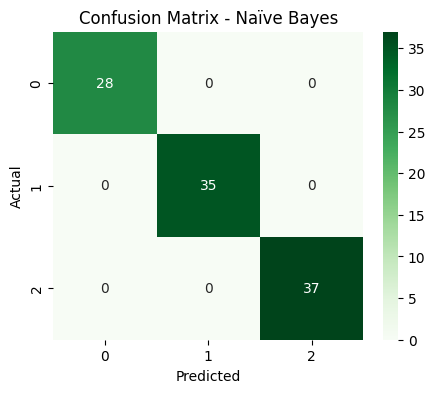

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Greens",
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

In [ ]:
print("Classification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb))

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



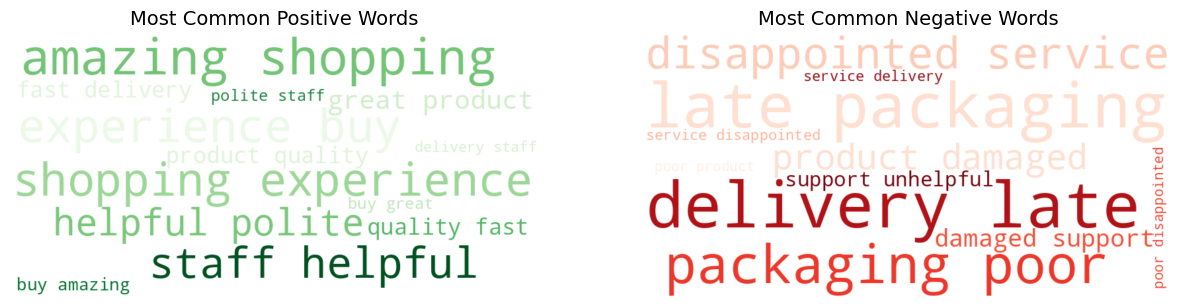

In [ ]:
from wordcloud import WordCloud

# Separate positive and negative feedback
positive_text = " ".join(df[df['Sentiment'] == "Positive"]["Cleaned_Feedback"])
negative_text = " ".join(df[df['Sentiment'] == "Negative"]["Cleaned_Feedback"])

# Generate word clouds
wc_positive = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
wc_negative = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

# Plot
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.imshow(wc_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Positive Words", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wc_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Negative Words", fontsize=14)

plt.show()

/tmp/ipython-input-573673565.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="Set2")


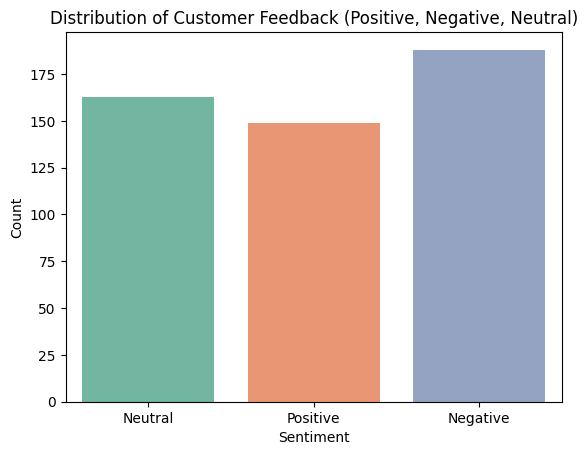

In [ ]:
sns.countplot(x="Sentiment", data=df, palette="Set2")
plt.title("Distribution of Customer Feedback (Positive, Negative, Neutral)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

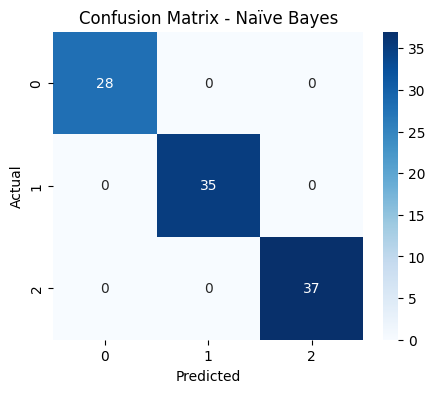

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Blues",
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()